In [1]:
import numpy as np
import os
import pandas as pd
import seaborn as sns

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

%load_ext autoreload
%autoreload 2

In [65]:
from legacyzpts.qa.paper_plots import ZeropointHistograms, myscatter, myerrorbar
from legacyzpts.qa.params import band2color,col2plotname

In [66]:
dr= "/Users/kaylan1/PhdStudent/Research/desi/publications/observing_paper/data"
z= ZeropointHistograms(decam=os.path.join(dr,"decam_zpts_b4errmessage_bootstrap10k.fits"),
                       mosaic=os.path.join(dr,"mosaic_zpts_bootstrap10k.fits"))

Converted image_filename from |S65 to <U65
Converted camera from |S7 to <U7
Converted ccdname from |S4 to <U4
Converted expid from |S16 to <U16
Converted object from |S35 to <U35
Converted propid from |S10 to <U10
Converted filter from |S1 to <U1
Converted date_obs from |S10 to <U10
Converted ut from |S15 to <U15
Converted ha from |S13 to <U13
Converted err_message from |S30 to <U30
Converted image_filename from |S100 to <U100
Converted camera from |S7 to <U7
Converted ccdname from |S4 to <U4
Converted expid from |S16 to <U16
Converted object from |S35 to <U35
Converted propid from |S10 to <U10
Converted filter from |S1 to <U1
Converted date_obs from |S10 to <U10
Converted ut from |S15 to <U15
Converted ha from |S13 to <U13
cleaning decam
Cutting finite to 9792/10000
Cutting zpt > 0 to 9731/9792
Cutting airmass > 0 to 9514/9731
cleaning mosaic
Cutting err_message to 9942/10000


# Depth plot, now separate figures for PSF and Galaxy

In [89]:
plt.legend?

skymag {'z', 'r', 'g'} z 3210
skymag {'z', 'r', 'g'} r 2913
skymag {'z', 'r', 'g'} g 3391
wrote hist_1d_skymag.png
skyrms {'z', 'r', 'g'} z 3210
skyrms {'z', 'r', 'g'} r 2913
skyrms {'z', 'r', 'g'} g 3391
wrote hist_1d_skyrms.png
zpt {'z', 'r', 'g'} z 3210
zpt {'z', 'r', 'g'} r 2913
zpt {'z', 'r', 'g'} g 3391
wrote hist_1d_zpt.png
airmass {'z', 'r', 'g'} z 3210
airmass {'z', 'r', 'g'} r 2913
airmass {'z', 'r', 'g'} g 3391
wrote hist_1d_airmass.png
fwhm {'z', 'r', 'g'} z 3210
fwhm {'z', 'r', 'g'} r 2913
fwhm {'z', 'r', 'g'} g 3391
wrote hist_1d_fwhm.png
gain {'z', 'r', 'g'} z 3210
gain {'z', 'r', 'g'} r 2913
gain {'z', 'r', 'g'} g 3391
wrote hist_1d_gain.png
transp {'z', 'r', 'g'} z 3210
transp {'z', 'r', 'g'} r 2913
transp {'z', 'r', 'g'} g 3391
wrote hist_1d_transp.png
seeing {'z', 'r', 'g'} z 3210
seeing {'z', 'r', 'g'} r 2913
seeing {'z', 'r', 'g'} g 3391
wrote hist_1d_seeing.png
psfdepth {'z', 'r', 'g'} z 3210
psfdepth {'z', 'r', 'g'} r 2913
psfdepth {'z', 'r', 'g'} g 3391
wrote hi

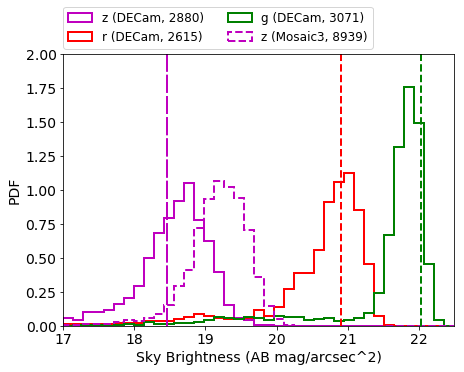

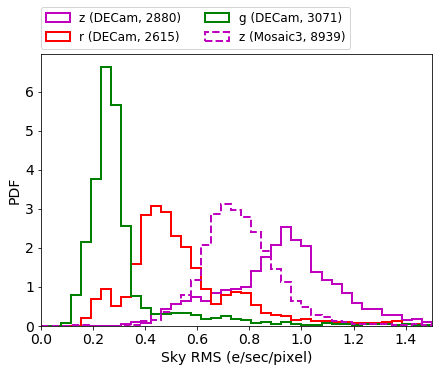

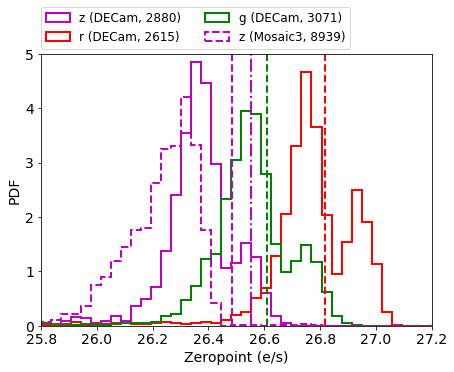

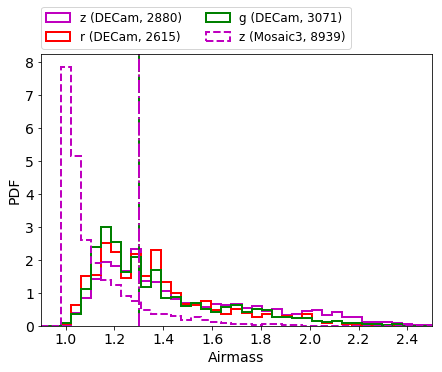

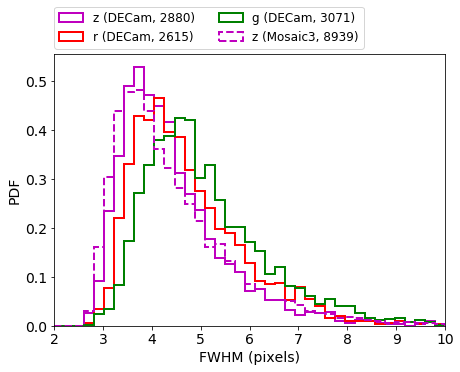

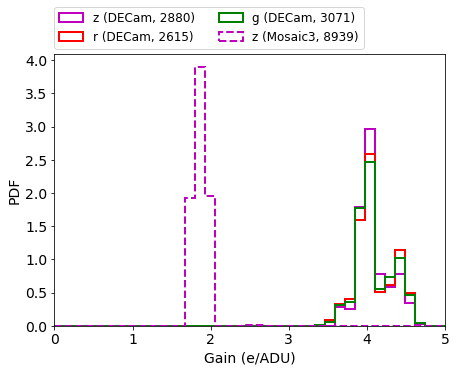

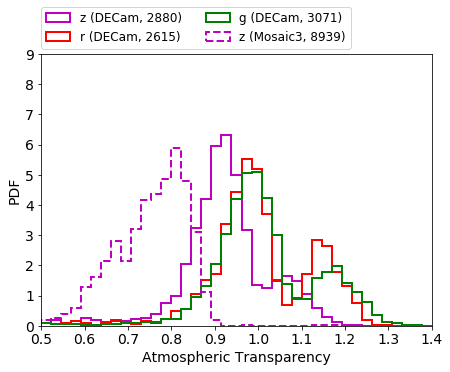

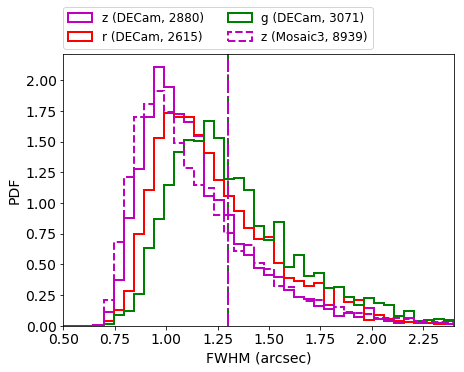

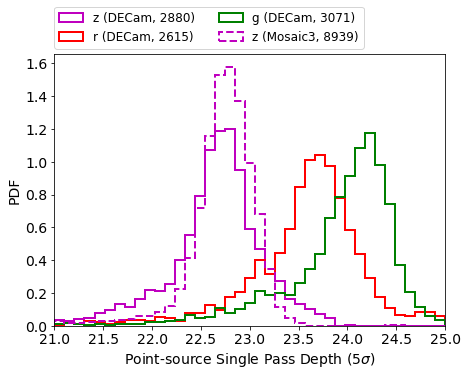

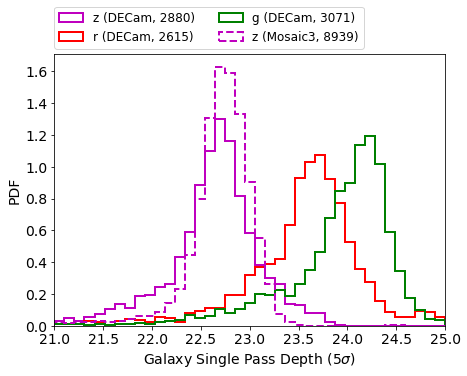

In [107]:
z.plot_hist_1d()

wrote hist_depth_psf.png
wrote hist_depth_gal.png


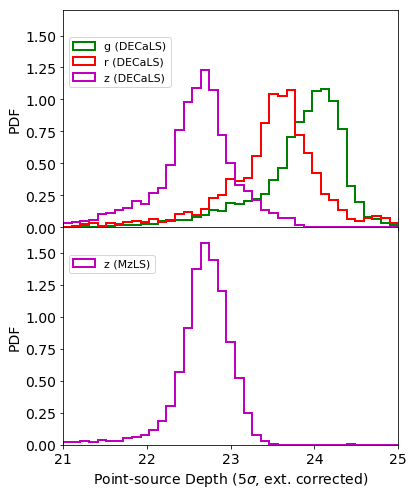

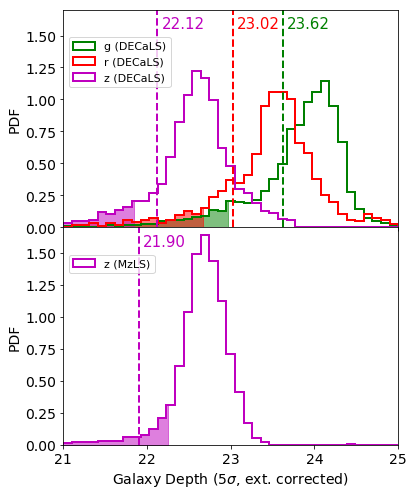

In [104]:
z.plot_hist_depth()

# DECaLS zeropoint bimodality

zpt {'z', 'r', 'g'} g 1107
zpt {'z', 'r', 'g'} g 58
zpt {'z', 'r', 'g'} g 999
zpt {'z', 'r', 'g'} r 543
zpt {'z', 'r', 'g'} r 57
zpt {'z', 'r', 'g'} r 954
zpt {'z', 'r', 'g'} z 305
zpt {'z', 'r', 'g'} z 48
zpt {'z', 'r', 'g'} z 1823
wrote hist_1d_perprogram_zpt.png


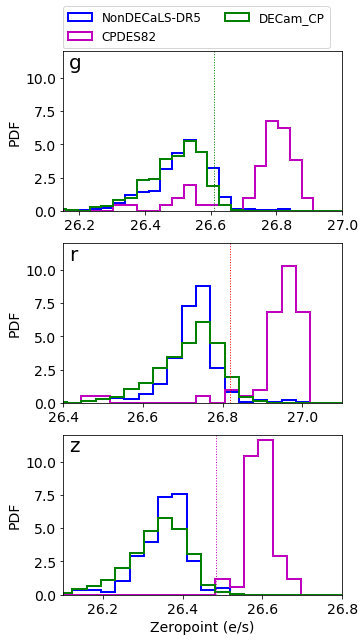

In [51]:
z.plot_hist_1d_perprogram()

# MzLS zeropoint change with time

wrote zpt_errorbars_mosaic.png
wrote radecoff_v_mjd_mosaic_scaled.png
wrote radecoff_v_mjd_mosaic.png


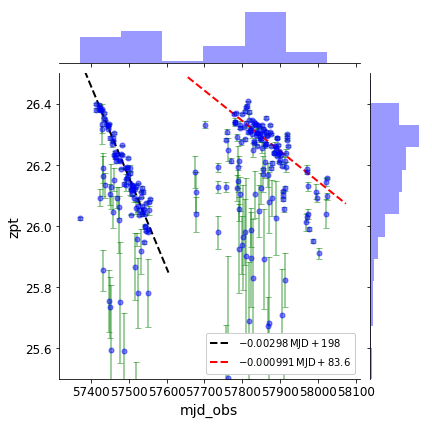

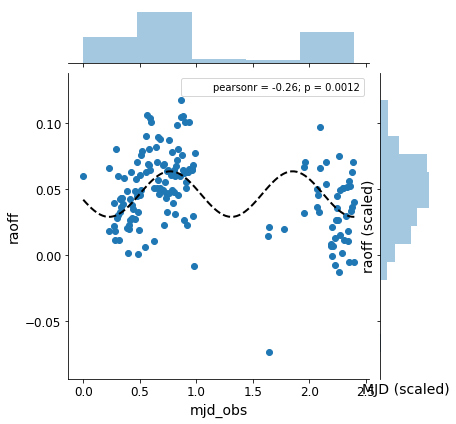

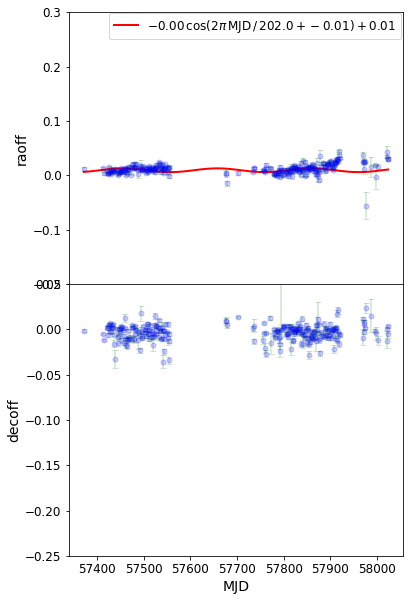

In [49]:
z.plot_v_mjd('mosaic')

wrote zpt_errorbars_decam.png
wrote radecoff_v_mjd_decam_scaled.png
wrote radecoff_v_mjd_decam.png


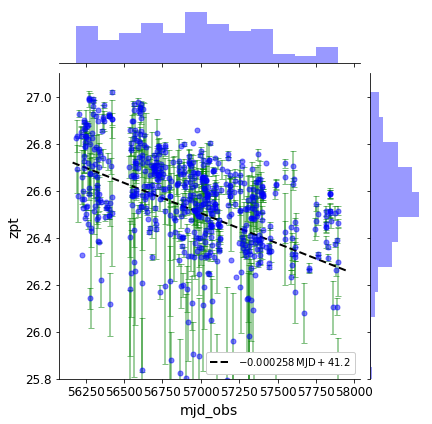

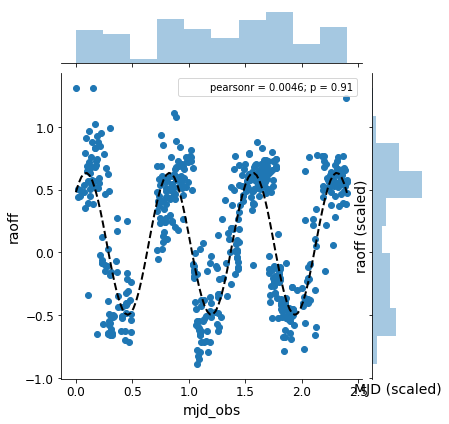

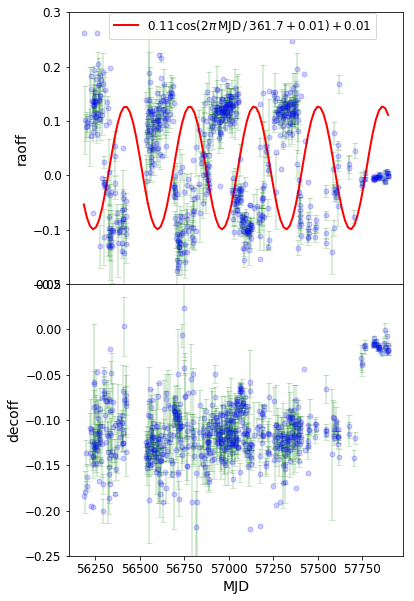

In [48]:
z.plot_v_mjd('decam')

# Other

wrote rms_2panel_raoff_decoff.png


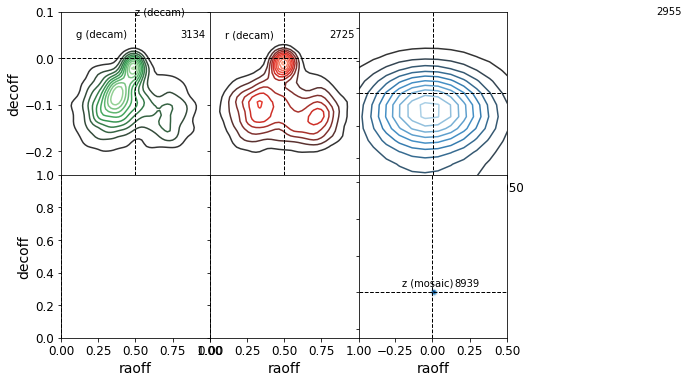

In [339]:
fig,ax= plt.subplots(2,3,figsize=(8,6))
plt.subplots_adjust(hspace=0,wspace=0)
# decam
x_key,y_key= 'raoff','decoff'
if z.decam:
    x,y= z.decam.get(x_key), z.decam.get(y_key)
    for band,cmap,col in zip('grz',['Greens_d','Reds_d','Blues_d'],
                             [0,1,2]): #set(z.decam.filter):
        keep= z.decam.filter == band
        sns.kdeplot(x[keep], y[keep], ax=ax[0,col],
                    cmap=cmap, shade=False, shade_lowest=False)
        ax[0,col].text(-0.2,0.05,'%s (decam)' % band, 
                       horizontalalignment='left',verticalalignment='center')
        ax[0,col].text(0.15,0.05,'%d' % z.num_exp['decam_'+band], 
                       horizontalalignment='left',verticalalignment='center')
                       #transform=ax[1,row].transAxes)
        if z.get_lim(x_key):
            xlim= z.get_lim(x_key)
            if xlim.__class__() == {}:
                xlim= xlim['decam']
            ax[0,col].set_xlim(xlim)
        if z.get_lim(y_key):
            ylim= z.get_lim(y_key)
            if ylim.__class__() == {}:
                ylim= ylim['decam']
            ax[0,col].set_ylim(ylim)
if z.mosaic:
    x,y= z.mosaic.get(x_key), z.mosaic.get(y_key)
    for band,cmap,col in zip('z',['Blues'],
                             [2]): 
        keep= z.mosaic.filter == band
        sns.kdeplot(x[keep], y[keep], ax=ax[1,col],
                    cmap=cmap, shade=False)
        ax[1,col].text(-0.2,0.05,'%s (mosaic)' % band, 
                       horizontalalignment='left',verticalalignment='center')
        ax[1,col].text(0.15,0.05,'%d' % z.num_exp['mosaic_'+band], 
                       horizontalalignment='left',verticalalignment='center')
                       #transform=ax[1,row].transAxes)
        if z.get_lim(x_key):
            xlim= z.get_lim(x_key)
            if xlim.__class__() == {}:
                xlim= xlim['mosaic']
            ax[0,col].set_xlim(xlim)
        if z.get_lim(y_key):
            ylim= z.get_lim(y_key)
            if ylim.__class__() == {}:
                ylim= ylim['mosaic']
            ax[0,col].set_ylim(ylim)
# Crosshairs
for row in range(2):
    for col in range(3):
        ax[row,col].axhline(0,c='k',ls='dashed',lw=1)
        ax[row,col].axvline(0,c='k',ls='dashed',lw=1)
# Label
for col in range(3):
    xlab=ax[1,col].set_xlabel(col2plotname(x_key)) #0.45'' galaxy
    #ax[1,col].tick_params(axis='both')
for row in range(2):
    ylab=ax[row,0].set_ylabel(col2plotname(y_key))
    #ax[row,0].tick_params(axis='both')

for row in range(2):
    for col in [1,2]:
        ax[row,col].yaxis.set_ticklabels([])

savefn='rms_2panel_%s_%s.png' % (x_key,y_key)
plt.savefig(savefn, bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)
print("wrote %s" % savefn)


In [537]:
sns.jointplot?

(26, 27)

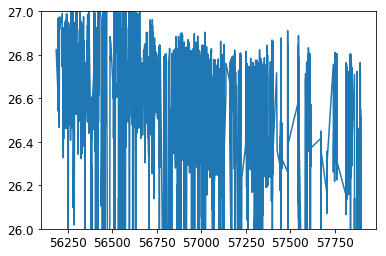

In [340]:
keep= z.decam.zpt > 20
plt.plot(z.decam.mjd_obs[keep],z.decam.zpt[keep])
plt.ylim(26,27)

In [348]:
cols= ["actualDateObs","mjd_obs",'seeing','zpt','transp','skymag','airmass',
       "decoff","raoff","filter",
       'skycounts','skyrms']
keep= ((z.decam.zpt > 0) &
       (z.decam.airmass > -1))
df_decam= pd.DataFrame({col:z.decam.get(col)[keep] 
                        for col in cols})
df_decam= df_decam.apply(lambda x: x.values.byteswap().newbyteorder())

keep= ((z.mosaic.zpt > 0) &
       (z.mosaic.airmass > -1))
df_mosaic= pd.DataFrame({col:z.mosaic.get(col)[keep] 
                        for col in cols})
df_mosaic= df_mosaic.apply(lambda x: x.values.byteswap().newbyteorder())




In [366]:
def std_err_mean(x):
    return np.std(x)/np.sqrt(len(x)-1)

decam_avg= df_decam.groupby(['actualDateObs']).agg(np.mean).reset_index()
decam_err= df_decam.groupby(['actualDateObs']).agg(std_err_mean).reset_index()

decam_err.head()

/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/Users/kaylan1/miniconda3/envs/mlbook/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


,actualDateObs,airmass,decoff,mjd_obs,raoff,seeing,skycounts,skymag,skyrms,transp,zpt
0,2012-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-09-23,0.118369,0.023219,0.038998,0.061742,0.154657,13.483607,0.483460,0.130030,0.019726,0.103179
2,2012-09-25,0.056357,0.014455,0.023817,0.025424,0.058245,10.201517,0.198951,0.075724,0.017950,0.069215
3,2012-10-01,0.065000,0.005598,0.011109,0.018601,0.307757,56.133026,0.015060,0.162135,0.006178,0.109668
4,2012-10-03,0.072295,0.013795,0.014823,0.019426,0.147873,47.406754,0.330061,0.348186,0.010067,0.016033


(26, 27.1)

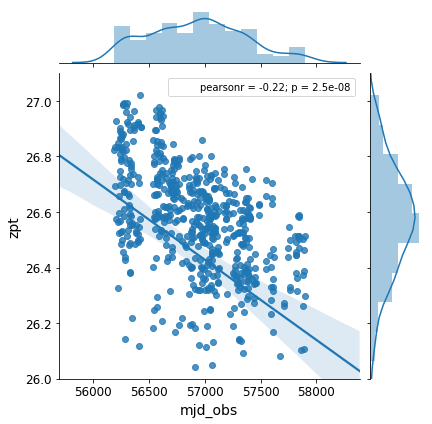

In [364]:
g = sns.jointplot('mjd_obs', "zpt", data=decam_avg, kind="reg")
g.ax_joint.set_ylim(26,27.1)

In [394]:
class LeastSquares(object):
    def __init__(self,x,y,yerr):
        self.sum_inv_yerr2= np.sum(1/yerr**2)
        self.sum_y_inv_yerr2= np.sum(y/yerr**2)
        self.sum_x_inv_yerr2= np.sum(x/yerr**2)
        self.sum_xy_inv_yerr2= np.sum(x*y/yerr**2)
        self.sum_x2_inv_yerr2= np.sum(x**2/yerr**2)
        self.delta= self.sum_inv_yerr2 * self.sum_x2_inv_yerr2 - self.sum_x_inv_yerr2**2
        
    def estim(self):
        return self.slope(),self.inter(),self.err_slope(),self.err_inter()
    
    def slope(self):
        return 1/self.delta * (self.sum_inv_yerr2*self.sum_xy_inv_yerr2 - \
                               self.sum_x_inv_yerr2 * self.sum_y_inv_yerr2)
    
    def inter(self):
        return 1/self.delta * (self.sum_x2_inv_yerr2*self.sum_y_inv_yerr2 - \
                               self.sum_x_inv_yerr2 * self.sum_xy_inv_yerr2)
    
    def err_slope(self):
        return 1/self.delta * self.sum_inv_yerr2
    
    def err_inter(self):
        return 1/self.delta * self.sum_x2_inv_yerr2

wrote zpt_errorbars.png


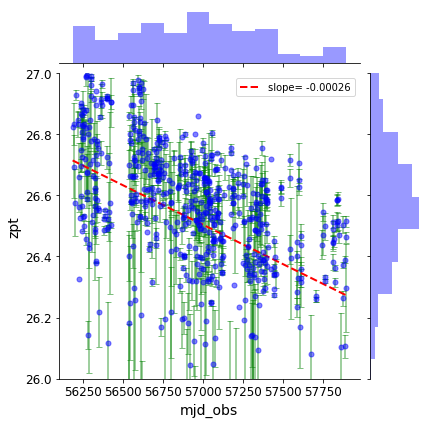

In [509]:
g = sns.JointGrid(x='mjd_obs',y="zpt", data=decam_avg)

kwargs= dict(ls='none',alpha=0.5,marker='o',ms=5,
             mfc='b',mec='b',ecolor='g',mew=1,capsize=3)
g = g.plot_joint(plt.errorbar, yerr=decam_err['zpt'], **kwargs)

slope,inter,err_s,err_i= LeastSquares(decam_avg['mjd_obs'],
                                      decam_avg['zpt'],decam_err['zpt']).estim()
x= np.linspace(decam_avg['mjd_obs'].min(),decam_avg['mjd_obs'].max())
g.ax_joint.plot(x,slope*x+inter,'r--',lw=2,
                label='slope= %.2g' % slope)
g.ax_joint.legend(loc='upper right')

g = g.plot_marginals(sns.distplot, kde=False, color=kwargs['mfc'])

g.ax_joint.set_ylim(26,27)

savefn='zpt_errorbars.png'
g.savefig(savefn, bbox_inches='tight',dpi=150)
print("wrote %s" % savefn)

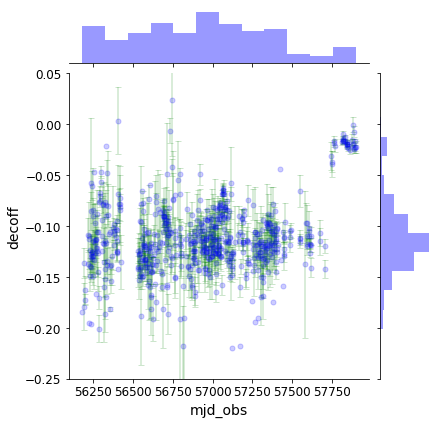

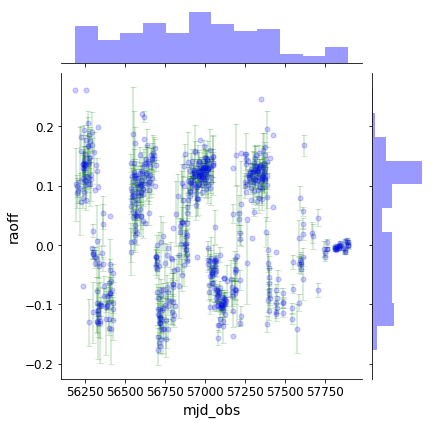

In [403]:
for Y,ylim in [("decoff",(-0.25,0.05)),
               ("raoff",(None,None))]:
    g = sns.JointGrid(x='mjd_obs',y=Y, data=decam_avg)

    kwargs= dict(ls='none',alpha=0.2,marker='o',ms=5,
                 mfc='b',mec='b',ecolor='g',mew=1,capsize=3)
    g = g.plot_joint(plt.errorbar, yerr=decam_err[Y], **kwargs)

    # slope,inter,err_s,err_i= LeastSquares(decam_avg['mjd_obs'],
    #                                       decam_avg[Y],decam_err[Y]).estim()
    # x= np.linspace(decam_avg['mjd_obs'].min(),decam_avg['mjd_obs'].max())
    # g.ax_joint.plot(x,slope*x+inter,'r--',lw=2,
    #                 label='slope= %.2g' % slope)
    # g.ax_joint.legend(loc='upper right')

    g = g.plot_marginals(sns.distplot, kde=False, color=kwargs['mfc'])

    g.ax_joint.set_ylim(ylim)

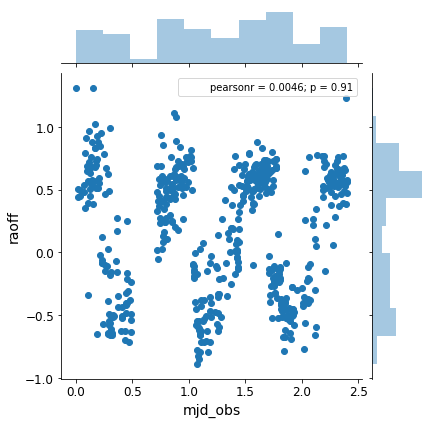

In [446]:
min_mjd= np.min(decam_avg['mjd_obs'])
x= decam_avg['mjd_obs'] - min_mjd
max_x= np.max(x)
x= x/max_x * 3.5
y= decam_avg['raoff'] * 5
keep= x <= 2.4
x= x[keep]
y= y[keep]

#sns.jointplot(decam_avg['mjd_obs'],decam_avg['raoff'])
sns.jointplot(x,y)

[-0.5653271   0.7394155  -3.89986632  0.06836131] 1


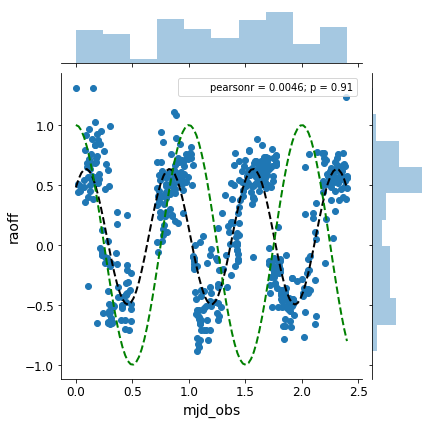

In [449]:
from scipy.optimize import leastsq

fitfunc = lambda p, x: p[0]*np.cos(2*np.pi/p[1]*x+p[2]) + p[3] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [1., 1., 0., 0.] # Initial guess for the parameters
p1, success = leastsq(errfunc, p0[:], args=(x, y))
print(p1,success)

g= sns.jointplot(x,y)
new_x= np.linspace(x.min(),x.max(),num=100)
g.ax_joint.plot(new_x,fitfunc(p1,new_x),'k--',lw=2)
g.ax_joint.plot(new_x,fitfunc(p0,new_x),'g--',lw=2)

In [471]:
period= p1[1]
period2= period*max_x/3.5
mjd_period= period2

offset= p1[3]/5
amp= p1[0]/5

phase_shift= -p1[2]/mjd_period

p_new= [amp,mjd_period,phase_shift,offset]
print(p_new)

[-0.11306542018876187, 361.66252770697139, 0.010783163909252994, 0.013672262785556045]


(-0.2, 0.3)

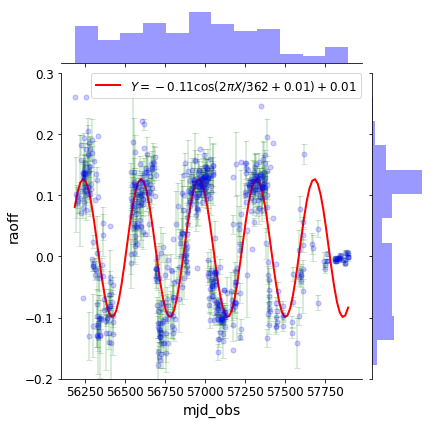

In [492]:
Y="raoff"
g = sns.JointGrid(x='mjd_obs',y=Y, data=decam_avg)

kwargs= dict(ls='none',alpha=0.2,marker='o',ms=5,
             mfc='b',mec='b',ecolor='g',mew=1,capsize=3)
g = g.plot_joint(plt.errorbar, yerr=decam_err[Y], **kwargs)

# slope,inter,err_s,err_i= LeastSquares(decam_avg['mjd_obs'],
#                                       decam_avg[Y],decam_err[Y]).estim()
# x= np.linspace(decam_avg['mjd_obs'].min(),decam_avg['mjd_obs'].max())
# g.ax_joint.plot(x,slope*x+inter,'r--',lw=2,
#                 label='slope= %.2g' % slope)
# g.ax_joint.legend(loc='upper right')

g = g.plot_marginals(sns.distplot, kde=False, color=kwargs['mfc'])

new_x= np.linspace(decam_avg['mjd_obs'].min(),decam_avg['mjd_obs'].max(),num=100)
g.ax_joint.plot(new_x,fitfunc(p_new,new_x),'r-',lw=2,
                label=r'$Y=%.2f \cos\left(2\pi X / %.0f + %.2f\right) + %.2f$' % \
                        (p_new[0],p_new[1],p_new[2],p_new[3]))
g.ax_joint.legend(loc=(0.1,0.92),fontsize=12)

g.ax_joint.set_ylim(-0.2,0.3)

wrote raoff_decoff_errorbars.png


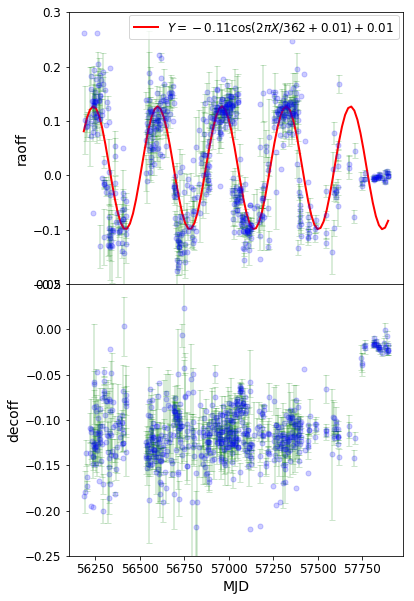

In [507]:
fig,ax=plt.subplots(2,1,figsize=(6,10))
plt.subplots_adjust(hspace=0)

kwargs= dict(ls='none',alpha=0.2,marker='o',ms=5,
             mfc='b',mec='b',ecolor='g',mew=1,capsize=3)
for row,Y in zip(range(2),["raoff","decoff"]):
    ax[row].errorbar(decam_avg["mjd_obs"],decam_avg[Y], 
                     yerr=decam_err[Y], **kwargs)
    if Y == 'raoff':
        new_x= np.linspace(decam_avg['mjd_obs'].min(),decam_avg['mjd_obs'].max(),num=100)
        ax[row].plot(new_x,fitfunc(p_new,new_x),'r-',lw=2,
                     label=r'$Y=%.2f \cos\left(2\pi X / %.0f + %.2f\right) + %.2f$' % \
                           (p_new[0],p_new[1],p_new[2],p_new[3]))
    if Y == "raoff":
        ax[row].set_ylim(-0.2,0.3)
        handles, labels = ax[row].get_legend_handles_labels()
        ax[row].legend([handles[0]],[labels[0]],loc=(0.18,0.90),fontsize=12)
    else:
        ax[row].set_ylim(-0.25,0.05)
    ylab= ax[row].set_ylabel(Y)
xlab= ax[1].set_xlabel('MJD')

savefn='raoff_decoff_errorbars.png'
plt.savefig(savefn, bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)
print("wrote %s" % savefn)

In [501]:
handles, labels = ax[0].get_legend_handles_labels()
labels

['$Y=-0.11 \\cos\\left(2\\pi X / 362 + 0.01\\right) + 0.01$', 'raoff']

(-0.25, 0.05)

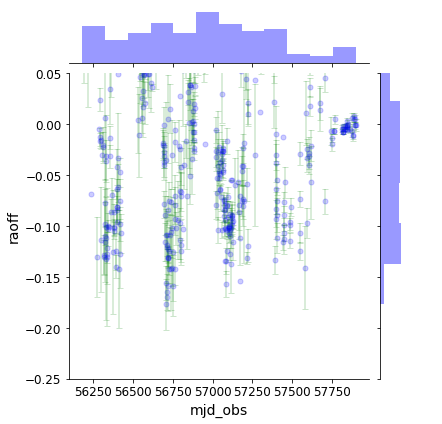

In [401]:
Y= "raoff"

g = sns.JointGrid(x='mjd_obs',y=Y, data=decam_avg)

kwargs= dict(ls='none',alpha=0.2,marker='o',ms=5,
             mfc='b',mec='b',ecolor='g',mew=1,capsize=3)
g = g.plot_joint(plt.errorbar, yerr=decam_err[Y], **kwargs)

# slope,inter,err_s,err_i= LeastSquares(decam_avg['mjd_obs'],
#                                       decam_avg[Y],decam_err[Y]).estim()
# x= np.linspace(decam_avg['mjd_obs'].min(),decam_avg['mjd_obs'].max())
# g.ax_joint.plot(x,slope*x+inter,'r--',lw=2,
#                 label='slope= %.2g' % slope)
# g.ax_joint.legend(loc='upper right')

g = g.plot_marginals(sns.distplot, kde=False, color=kwargs['mfc'])

g.ax_joint.set_ylim(-0.25,0.05)

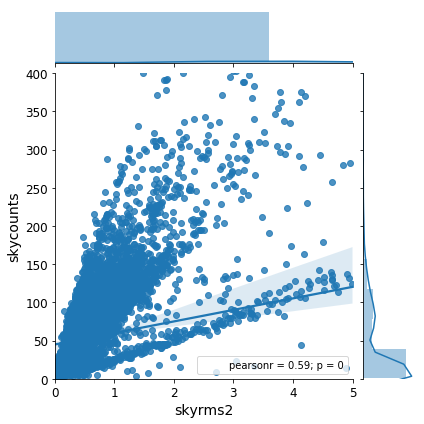

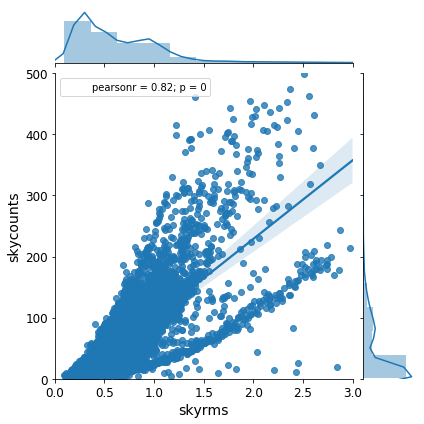

In [126]:
### Is skyrms^2 == skycounts, as we expect?
df_decam['skyrms2']= np.power(df_decam['skyrms'],2)
g = sns.jointplot('skyrms2', 'skycounts', data=df_decam, kind="reg",
                  xlim=(0,5),ylim=(0,400))
g = sns.jointplot('skyrms', 'skycounts', data=df_decam, kind="reg",
                  xlim=(0,3),ylim=(0,500))
# g.ax_joint.set_yscale('log')
# g.ax_marg_y.set_yscale('log')

# g.ax_joint.set_xscale('log')
# g.ax_marg_x.set_xscale('log')

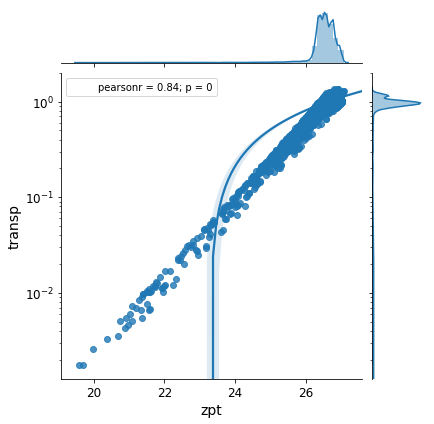

In [133]:
g = sns.jointplot('zpt', 'transp', data=df_decam, kind="reg")
g.ax_joint.set_yscale('log')
g.ax_marg_y.set_yscale('log')

# g.ax_joint.set_xscale('log')
# g.ax_marg_x.set_xscale('log')

In [776]:
plt.text?

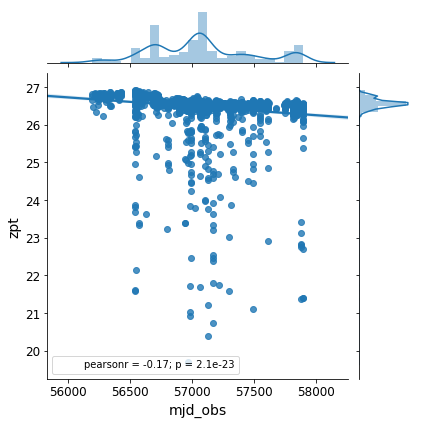

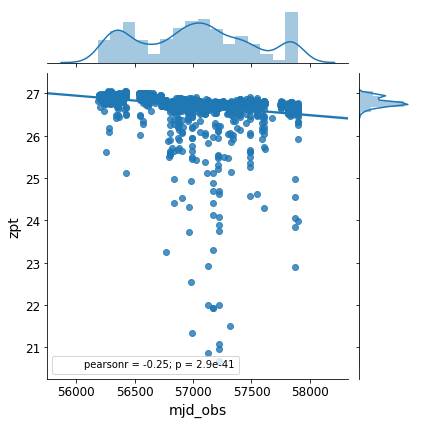

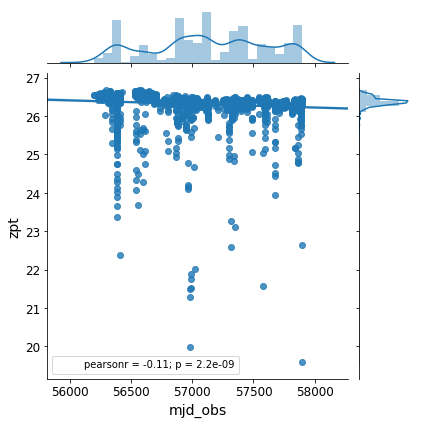

In [140]:
### per BAND
for band in 'grz':
    g = sns.jointplot('mjd_obs', "zpt", data=df_decam[df_decam["filter"] == band], kind="reg")
#g.ax_joint.set_ylim(26,27.1)

(-0.4, 0.4)

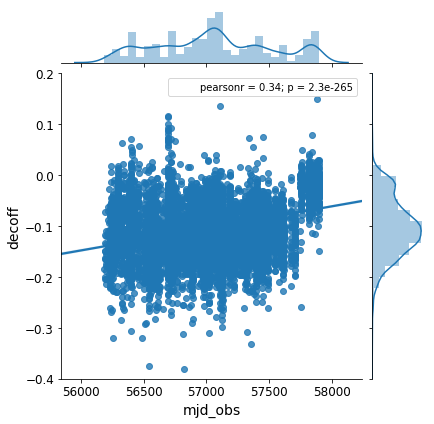

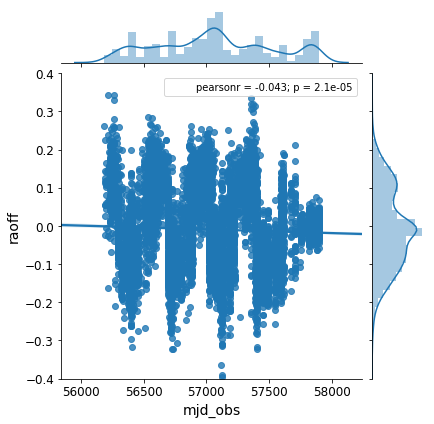

In [120]:
g = sns.jointplot('mjd_obs', "decoff", data=df_decam, kind="reg")
g.ax_joint.set_ylim(-0.4,0.2)

g = sns.jointplot('mjd_obs', "raoff", data=df_decam, kind="reg")
g.ax_joint.set_ylim(-0.4,0.4)

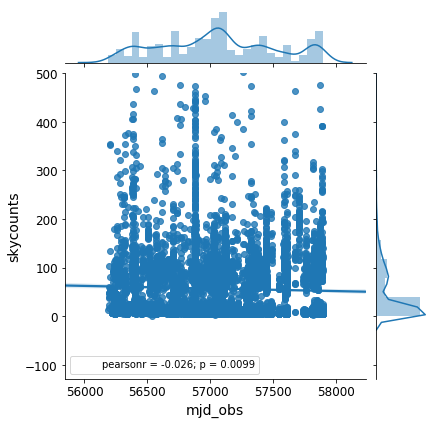

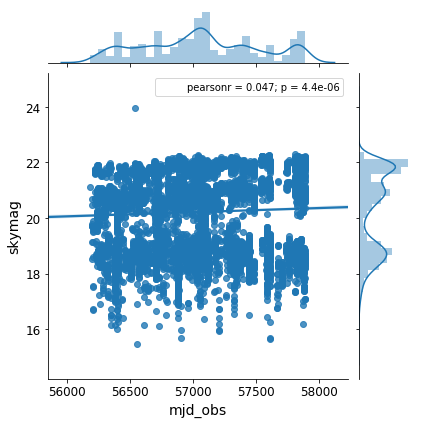

In [127]:
g = sns.jointplot('mjd_obs', "skycounts", data=df_decam, kind="reg")
g.ax_joint.set_ylim(None,500)

g = sns.jointplot('mjd_obs', "skymag", data=df_decam, kind="reg")
#g.ax_joint.set_ylim(-0.4,0.4)

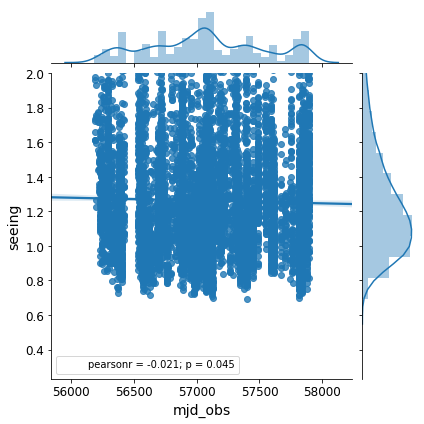

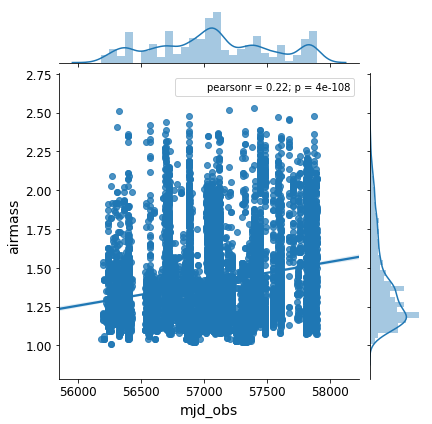

In [136]:
g = sns.jointplot('mjd_obs', "seeing", data=df_decam, kind="reg")
g.ax_joint.set_ylim(None,2)

g = sns.jointplot('mjd_obs', "airmass", data=df_decam, kind="reg")
#g.ax_joint.set_ylim(-0.4,0.4)

In [172]:
# Mzls Transparency Bug?

from astrometry.util.fits import fits_table,merge_tables
dr4=fits_table(os.path.join(dr,"survey-ccds-mzls.fits.gz"))
dr3= [fits_table(os.path.join(dr,"survey-ccds-%s.fits.gz" % name))
      for name in ['decals','extra','nondecals']]
dr3= merge_tables(dr3, columns='fillzero')

Converted object from |S24 to <U24
Converted filter from |S1 to <U1
Converted date_obs from |S10 to <U10
Converted ut from |S12 to <U12
Converted ha from |S12 to <U12
Converted propid from |S12 to <U12
Converted ccdname from |S4 to <U4
Converted camera from |S7 to <U7
Converted expid from |S15 to <U15
Converted image_filename from |S55 to <U55
Converted object from |S35 to <U35
Converted filter from |S1 to <U1
Converted date_obs from |S10 to <U10
Converted ut from |S15 to <U15
Converted ha from |S13 to <U13
Converted propid from |S10 to <U10
Converted ccdname from |S3 to <U3
Converted camera from |S5 to <U5
Converted expid from |S12 to <U12
Converted image_filename from |S61 to <U61
Converted object from |S37 to <U37
Converted filter from |S1 to <U1
Converted date_obs from |S10 to <U10
Converted ut from |S15 to <U15
Converted ha from |S13 to <U13
Converted propid from |S10 to <U10
Converted ccdname from |S3 to <U3
Converted camera from |S5 to <U5
Converted expid from |S12 to <U12
Conve

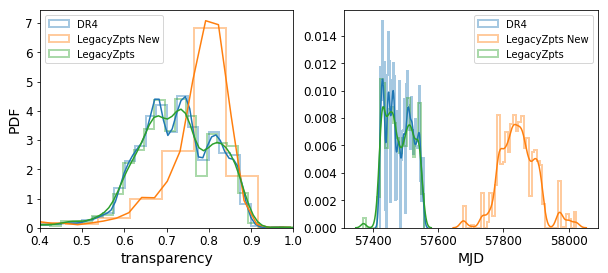

In [729]:
fig,ax=plt.subplots(1,2,figsize=(10,4))

kwargs= dict(kde=True,
             hist_kws={"histtype": "step",'lw':2})

keep= dr4.ccdtransp < 2
sns.distplot(dr4.ccdtransp[keep],ax=ax[0],label='DR4',**kwargs) 
isNew= z.mosaic.mjd_obs > 57600
sns.distplot(z.mosaic.transp[isNew],ax=ax[0],label='LegacyZpts New',**kwargs)
sns.distplot(z.mosaic.transp[~isNew],ax=ax[0],label='LegacyZpts',**kwargs)
ax[0].legend()
ax[0].set_xlim(0.4,1.)
ax[0].set_xlabel('transparency')
ax[0].set_ylabel('PDF')

sns.distplot(dr4.mjd_obs[keep],ax=ax[1],label='DR4',**kwargs) 
sns.distplot(z.mosaic.mjd_obs[isNew],ax=ax[1],label='LegacyZpts New',**kwargs)
sns.distplot(z.mosaic.mjd_obs[~isNew],ax=ax[1],label='LegacyZpts',**kwargs)
ax[1].legend()
#ax[1].set_xlim(0.4,1.)
ax[1].set_xlabel('MJD')


In [752]:
dr.arawgain

array([ 1.94000006,  1.86000001,  1.90999997, ...,  1.86000001,
        1.90999997,  1.72000003], dtype=float32)

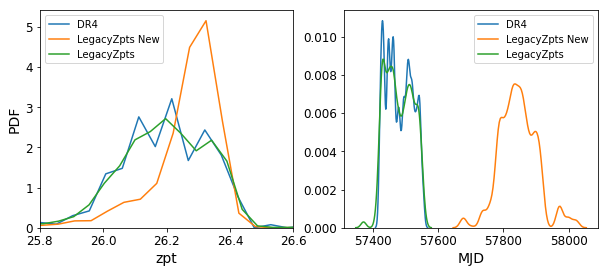

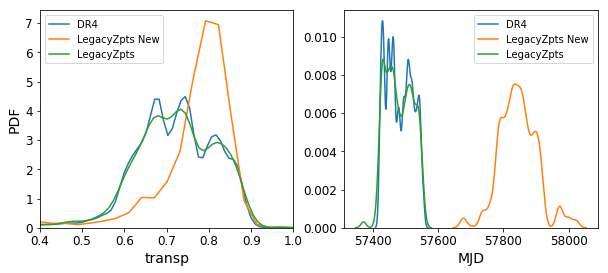

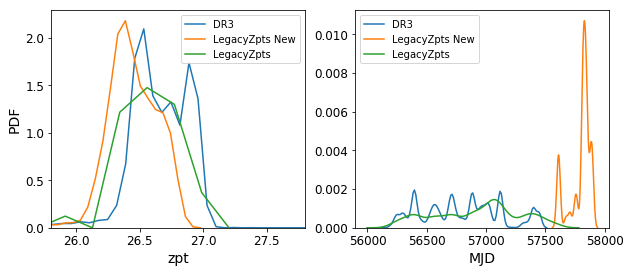

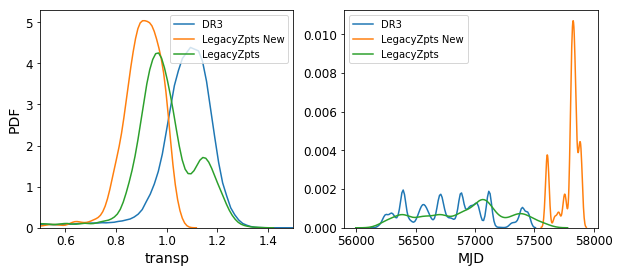

In [773]:
def convert_idl2legacy(camera,dr,key):
    """dr is dr3 or dr4 survey-ccds fit table"""
    assert(key in ['zpt','transp'])
    if camera == 'mosaic':
        val= dr.get('ccd'+key)
    elif camera == 'decam':
        if key == 'zpt':
            val= dr.get('ccd'+key) + 2.5*np.log10(dr.arawgain)
        elif key == 'transp':
            val= dr.get('ccd'+key) * 1# dr.arawgain
    dr.set('ccd'+key+'_legunits',val)

def plot_hist_at_diff_mjd(camera,dr,key):
    """dr is dr3 or dr4 survey-ccds fit table"""
    assert(key in ['zpt','transp'])
    convert_idl2legacy(camera,dr,key)
    
    mjdBoundary= dict(mosaic=57600,
                      decam=57500)
    xlim=dict(mosaic=dict(transp=(0.4,1.),
                          zpt=(25.8,26.6)),
              decam=dict(transp=(0.5,1.5),
                         zpt=(25.8,27.8)))
    label=dict(mosaic='DR4',decam='DR3')

    fig,ax=plt.subplots(1,2,figsize=(10,4))

    kwargs= dict(kde=True,hist=False,
                 hist_kws={"histtype": "step",'lw':2})

    if key == 'transp':
        keep= dr.get('ccd'+key+'_legunits') < 2
    elif key == 'zpt':
        keep= ((dr.get('ccd'+key+'_legunits') < 29) & 
               (dr.get('ccd'+key+'_legunits') > 20))

    sns.distplot(dr.get('ccd'+key+'_legunits')[keep],
                 ax=ax[0],label=label[camera],**kwargs) 
    isNew= getattr(z,camera).mjd_obs > 57600
    sns.distplot(getattr(z,camera).get(key)[isNew],ax=ax[0],label='LegacyZpts New',**kwargs)
    sns.distplot(getattr(z,camera).get(key)[~isNew],ax=ax[0],label='LegacyZpts',**kwargs)
    ax[0].legend()
    ax[0].set_xlim(xlim[camera][key])
    ax[0].set_xlabel(key)
    ax[0].set_ylabel('PDF')

    sns.distplot(dr.mjd_obs[keep],ax=ax[1],label=label[camera],**kwargs) 
    sns.distplot(getattr(z,camera).mjd_obs[isNew],ax=ax[1],label='LegacyZpts New',**kwargs)
    sns.distplot(getattr(z,camera).mjd_obs[~isNew],ax=ax[1],label='LegacyZpts',**kwargs)
    ax[1].legend()
    ax[1].set_xlabel('MJD')
    
plot_hist_at_diff_mjd('mosaic',dr4,'zpt')
plot_hist_at_diff_mjd('mosaic',dr4,'transp')
plot_hist_at_diff_mjd('decam',dr3,'zpt')
plot_hist_at_diff_mjd('decam',dr3,'transp')

In [775]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

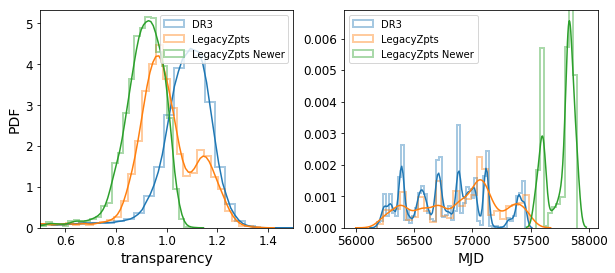

In [194]:
fig,ax=plt.subplots(1,2,figsize=(10,4))

kwargs= dict(kde=True,
             hist_kws={"histtype": "step",'lw':2})

keep= dr3.ccdtransp < 2
sns.distplot(dr3.ccdtransp[keep],ax=ax[0],label='DR3',**kwargs)

isNewer= z.decam.mjd_obs > 57500
sns.distplot(z.decam.transp[~isNewer],ax=ax[0],label='LegacyZpts',**kwargs)
sns.distplot(z.decam.transp[isNewer],ax=ax[0],label='LegacyZpts Newer',**kwargs)
ax[0].legend()
ax[0].set_xlim(0.5,1.5)
ax[0].set_xlabel('transparency')
ax[0].set_ylabel('PDF')

sns.distplot(dr3.mjd_obs[keep],ax=ax[1],label='DR3',**kwargs) 
sns.distplot(z.decam.mjd_obs[~isNewer],ax=ax[1],label='LegacyZpts',**kwargs)
sns.distplot(z.decam.mjd_obs[isNewer],ax=ax[1],label='LegacyZpts Newer',**kwargs)
ax[1].legend()
#ax[1].set_xlim(0.4,1.)
ax[1].set_xlabel('MJD')

(0, 1)

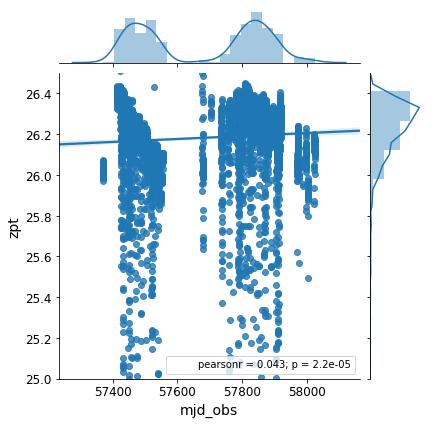

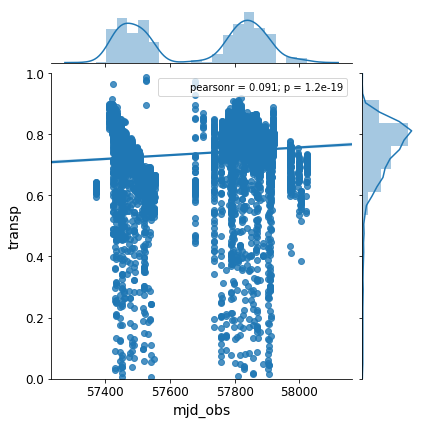

In [199]:
g = sns.jointplot('mjd_obs', "zpt", data=df_mosaic, kind="reg")
g.ax_joint.set_ylim(25,26.5)

g = sns.jointplot('mjd_obs', "transp", data=df_mosaic, kind="reg")
g.ax_joint.set_ylim(0,1)

In [200]:
z.decam.get_columns()

['image_filename',
 'image_hdu',
 'camera',
 'expnum',
 'ccdname',
 'ccdnum',
 'expid',
 'object',
 'propid',
 'filter',
 'exptime',
 'date_obs',
 'mjd_obs',
 'ut',
 'ha',
 'airmass',
 'fwhm',
 'fwhm_cp',
 'gain',
 'width',
 'height',
 'ra_bore',
 'dec_bore',
 'crpix1',
 'crpix2',
 'crval1',
 'crval2',
 'cd1_1',
 'cd1_2',
 'cd2_1',
 'cd2_2',
 'pixscale',
 'zptavg',
 'ra',
 'dec',
 'skymag',
 'skycounts',
 'skycounts_a',
 'skyrms',
 'skyrms_a',
 'skyrms_b',
 'skyrms_c',
 'skyrms_d',
 'skyrms_sm',
 'skyrms_clip',
 'skyrms_clip_sm',
 'skyrms_sigma',
 'nstarfind',
 'nstar',
 'nmatch',
 'mdncol',
 'phoff',
 'phrms',
 'zpt',
 'transp',
 'raoff',
 'decoff',
 'rarms',
 'decrms',
 'rastddev',
 'decstddev',
 'avsky',
 'ebv',
 'AcoEBV',
 'seeing',
 'err_on_phoff',
 'err_on_radecoff',
 'psfdepth',
 'galdepth',
 'psfdepth_extcorr',
 'galdepth_extcorr']

In [204]:
z.decam.expnum,z.decam.object

(array([522187, 359257, 477333, ..., 425275, 392442, 210098], dtype=int32),
 array(['DECaLS_25633_z                     ',
        'DES supernova hex SN-S1 tiling 21  ',
        'DES supernova hex SN-X3 tiling 23  ', ...,
        'DECaLS_23026_z                     ',
        'DECaLS_10822_g                     ',
        'SDSS_J102430                       '],
       dtype='<U35'))

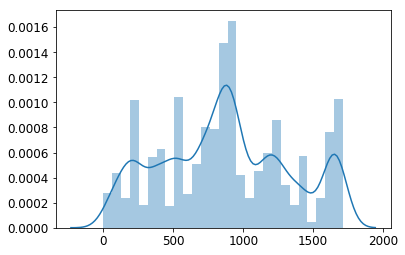

In [208]:
sns.distplot(z.decam.mjd_obs - z.decam.mjd_obs.min())

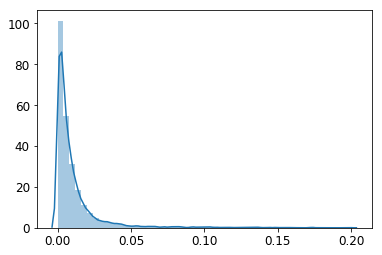

In [229]:
isort= np.argsort(z.decam.mjd_obs)
dm= z.decam.mjd_obs[isort][1:] - z.decam.mjd_obs[isort][:-1]
sns.distplot(dm[dm < 0.2])

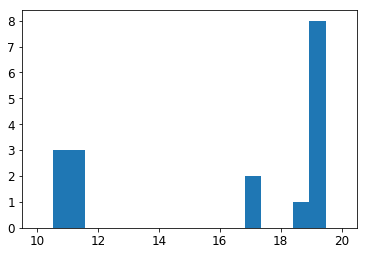

In [215]:
kwargs= dict(kde=False,
             hist_kws={"histtype": "step",'lw':2})

dm= z.decam.mjd_obs[] - z.decam.mjd_obs.min()
#sns.distplot(dm[dm < 100],bins=**kwargs)
_=plt.hist(dm[dm<20],bins=np.linspace(10,20,20))

/Users/kaylan1/.local/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/kaylan1/.local/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


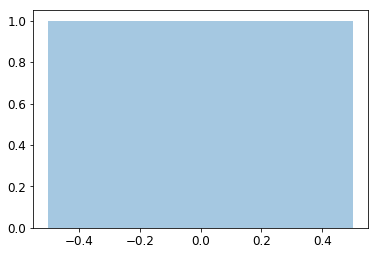

In [213]:
sns.distplot(dm[dm<2])

In [233]:
len(set(z.decam.date_obs[isort])), z.decam.date_obs[isort][300]

(707, '2013-01-04')

# Assign each row to the actual "night" it was observed during

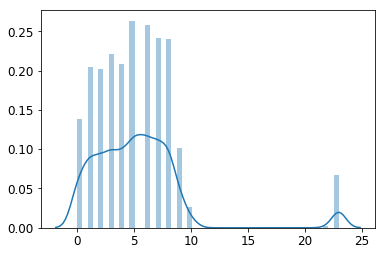

In [327]:
a= np.array(pd.Series(decam.ut).str.split(":").str[0].values).astype(int)
sns.distplot(a)

In [275]:
# sort by mjd, so utc will make sense
isort= np.argsort(z.decam.mjd_obs)
decam= z.decam[isort]

In [276]:
from collections import defaultdict
dm_dict= defaultdict(list)
for yymmdd in set(decam.date_obs):
    i= decam.date_obs == yymmdd
    dm_dict["yymmdd"].append(yymmdd)
    dm_dict["dm"].append(decam[i].mjd_obs[-1] - decam[i].mjd_obs[0])
    
    

In [277]:
dm_dict['yymmdd'][np.argmax(dm_dict['dm'])]

'2015-03-28'

### in UTC, either before 15 hours or later (next day)

In [280]:
decam[decam.date_obs == '2015-03-28'].ut

array(['00:01:47.130300', '00:06:10.948387', '00:10:17.654221',
       '00:10:17.654221', '00:14:26.069743', '00:18:41.066376',
       '02:31:49.856375', '02:48:49.650761', '02:48:49.650761',
       '02:55:30.537371', '03:04:20.878333', '03:04:20.878333',
       '03:08:50.378540', '03:13:10.406977', '03:24:18.835113',
       '03:45:51.996912', '03:52:30.398864', '04:03:48.927519',
       '04:11:53.987441', '04:19:29.577450', '04:49:49.808447',
       '05:28:49.233130', '05:30:07.146046', '05:40:16.827435',
       '05:42:40.895246', '05:54:20.253393', '06:03:42.111284',
       '06:03:42.111284', '06:10:49.894273', '06:22:45.374261',
       '06:52:43.449325', '07:17:29.969446', '07:21:09.918228',
       '07:30:04.307472', '07:39:24.447668', '07:43:09.492189',
       '07:43:09.492189', '07:46:45.390317', '07:52:09.361820',
       '08:09:11.090512', '08:15:09.741544', '08:27:23.205073',
       '08:43:58.674353', '08:47:47.632234', '08:54:01.484821',
       '09:00:16.788857', '09:06:32.8744

In [281]:
decam[decam.date_obs == '2015-03-27'].ut

array(['07:48:54.111346', '07:51:27.755908', '08:01:47.698627',
       '08:30:02.207628', '09:06:59.993014', '09:19:48.484179',
       '23:36:36.267327'],
      dtype='<U15')

### Assign the actual date to each row

In [328]:
actualDateObs= np.array(['0000-00-00']*len(decam))

sameNight= decam.ut < '15:00:00.0'
for yyyymmdd in set(decam.date_obs):
    thisNight= (decam.date_obs == yyyymmdd) & sameNight
    nextNight= (decam.date_obs == yyyymmdd) & ~sameNight
    TM= pd.Timestamp(yyyymmdd)
    actualDateObs[thisNight]= TM.strftime('%Y-%m-%d')
    actualDateObs[nextNight]= (TM + pd.DateOffset(1)).strftime('%Y-%m-%d')
    

### check that it worked

In [329]:
decam[actualDateObs == '2015-03-28'].ut

array(['23:36:36.267327', '00:01:47.130300', '00:06:10.948387',
       '00:10:17.654221', '00:10:17.654221', '00:14:26.069743',
       '00:18:41.066376', '02:31:49.856375', '02:48:49.650761',
       '02:48:49.650761', '02:55:30.537371', '03:04:20.878333',
       '03:04:20.878333', '03:08:50.378540', '03:13:10.406977',
       '03:24:18.835113', '03:45:51.996912', '03:52:30.398864',
       '04:03:48.927519', '04:11:53.987441', '04:19:29.577450',
       '04:49:49.808447', '05:28:49.233130', '05:30:07.146046',
       '05:40:16.827435', '05:42:40.895246', '05:54:20.253393',
       '06:03:42.111284', '06:03:42.111284', '06:10:49.894273',
       '06:22:45.374261', '06:52:43.449325', '07:17:29.969446',
       '07:21:09.918228', '07:30:04.307472', '07:39:24.447668',
       '07:43:09.492189', '07:43:09.492189', '07:46:45.390317',
       '07:52:09.361820', '08:09:11.090512', '08:15:09.741544',
       '08:27:23.205073', '08:43:58.674353', '08:47:47.632234',
       '08:54:01.484821', '09:00:16.7888

In [330]:
decam[actualDateObs == '2015-03-28'].mjd_obs

array([ 57108.98375309,  57109.00123993,  57109.00429338,  57109.00714878,
        57109.00714878,  57109.01002396,  57109.01297531,  57109.10543815,
        57109.11724133,  57109.11724133,  57109.12188122,  57109.12801943,
        57109.12801943,  57109.13113864,  57109.13414823,  57109.14188467,
        57109.15685182,  57109.16146295,  57109.16931629,  57109.17493041,
        57109.18020344,  57109.20127093,  57109.22834761,  57109.22924938,
        57109.23630587,  57109.23797332,  57109.24606775,  57109.25257073,
        57109.25257073,  57109.25752192,  57109.26580294,  57109.286614  ,
        57109.30381909,  57109.30636479,  57109.31254986,  57109.31903296,
        57109.32163764,  57109.32163764,  57109.32413646,  57109.32788613,
        57109.3397117 ,  57109.34386275,  57109.35235191,  57109.36387355,
        57109.36652352,  57109.37085052,  57109.37519432,  57109.37954716,
        57109.37954716,  57109.38911735])

# Mosaic ALREADY has each row assigned to correct date_obs

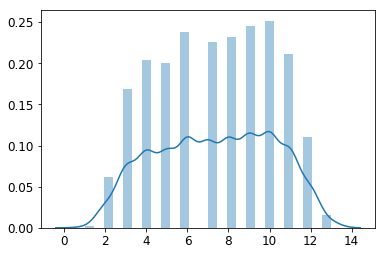

In [331]:
a= np.array(pd.Series(mosaic.ut).str.split(":").str[0].values).astype(int)
sns.distplot(a)

In [512]:
df= pd.DataFrame(dict(a=np.linspace(10,20)))
df["a"].iloc[1]= 10.0
df.head()

,a
0,10.000000
1,10.000000
2,10.408163
3,10.612245
4,10.816327


In [513]:
df.drop_duplicates("a",inplace=True)
df.head()

,a
0,10.000000
2,10.408163
3,10.612245
4,10.816327
5,11.020408


In [515]:
df.index.values

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [526]:
np.sort(z.decam.expid)

array(['00133951-S2     ', '00134423-N10    ', '00134426-S15    ', ...,
       '00650408-S6     ', '00650412-N21    ', '00650418-N22    '],
      dtype='<U16')

In [527]:
np.sort(['00133951-S2     ','00133951-A2     ','00133953-A2     '])

array(['00133951-A2     ', '00133951-S2     ', '00133953-A2     '],
      dtype='<U16')

In [528]:
np.random.randint(0,10,size=5)

array([1, 5, 7, 6, 6])

In [529]:
a=np.array(['00133951-S2     ','00133951-A2     ','00133953-A2     '])
a ==a 

array([ True,  True,  True], dtype=bool)

In [530]:
z.mosaic.fwhm

array([ 7.07034969,  6.7052989 ,  7.90599823, ...,  5.01791859,
        5.40816498,  5.72431421], dtype=float32)

In [531]:
pd.Series(np.array(['00064846-ccd1  ', '00064846-ccd2  ', '00064846-ccd3  '])).str.upper()

0    00064846-CCD1  
1    00064846-CCD2  
2    00064846-CCD3  
dtype: object

In [532]:
np.char.upper(np.array(['00064846-ccd1  ', '00064846-ccd2  ', '00064846-ccd3  ']))

array(['00064846-CCD1  ', '00064846-CCD2  ', '00064846-CCD3  '],
      dtype='<U15')

# Neff plots

In [713]:
from legacyzpts.qa.paper_plots import MatchedAnnotZpt, mytext,DepthRequirements,NeffFormulas


In [703]:
annot="/Users/kaylan1/PhdStudent/Research/desi/publications/observing_paper/neff_empirical"

M= MatchedAnnotZpt(decam=os.path.join(dr,'decam_zpts_b4errmessage_bootstrap10k.fits'),
                   decam_ann=os.path.join(annot,'ccds-annotated-decals.fits.gz'),
                   mosaic=os.path.join(dr,'mosaic_zpts_bootstrap10k.fits'),
                   mosaic_ann=os.path.join(annot,'ccds-annotated-mzls.fits.gz'))

Converted image_filename from |S65 to <U65
Converted camera from |S7 to <U7
Converted ccdname from |S4 to <U4
Converted expid from |S16 to <U16
Converted object from |S35 to <U35
Converted propid from |S10 to <U10
Converted filter from |S1 to <U1
Converted date_obs from |S10 to <U10
Converted ut from |S15 to <U15
Converted ha from |S13 to <U13
Converted object from |S37 to <U37
Converted filter from |S1 to <U1
Converted date_obs from |S10 to <U10
Converted ut from |S15 to <U15
Converted ha from |S13 to <U13
Converted propid from |S10 to <U10
Converted ccdname from |S3 to <U3
Converted camera from |S5 to <U5
Converted expid from |S12 to <U12
Converted image_filename from |S61 to <U61
Converted plver from |S6 to <U6
After cuts for decam,annot: remaining 477011/493440
After cuts for decam,zpt: remaining 9800/10000
After add depth, decam non-Nan remaining 9792/9800
After same_expid cuts decam,annot: remaining 1798/477011
After same_expid cuts decam,zpt: remaining 1800/9792
decam,z dropping

/Users/kaylan1/PhdStudent/Research/desi/legacyzpts/py/legacyzpts/qa/paper_plots.py:114: RuntimeWarning: divide by zero encountered in log10
  return -2.5*np.log10(5 * sigma) + self.zpt #natural camera units


After same_expid cuts mosaic,annot: remaining 3783/71272
After same_expid cuts mosaic,zpt: remaining 3882/9942
mosaic,z dropping 99 duplicates


In [547]:
for camera in M.cameras:
    M.add_corrected_depth(camera)
# decam_psf_a
depth= pd.DataFrame({"%s_%s_%s" % (camera,psf_or_gal,a_or_z):M[camera,a_or_z].get(psf_or_gal+"depth")}
                     for camera in M.cameras
                     for psf_or_gal in ['psf','gal']
                     for a_or_z in 'az')

In [648]:
def get_q25(x):
    return np.percentile(x,q=25)

def get_q50(x):
    return np.percentile(x,q=50)

def get_q75(x):
    return np.percentile(x,q=75)

In [634]:
y=M['decam','a'].get('galdepth')
model=M['decam','z'].get('galdepth')
new= pd.DataFrame(dict(y=y,model=model))
new['diff']= new['y'] - new['model']
new['bins']= pd.cut(new['y'],bins=15)
a= new.groupby('bins').agg([get_q25,get_q50,get_q75])

/Users/kaylan1/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:4274: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [672]:
plt.text?

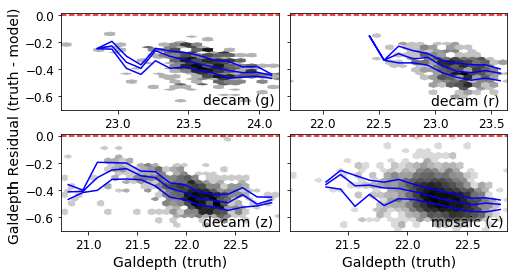

In [710]:
def firstcap(text):
    return "%s%s" % (text[0].upper(),text[1:].lower())

DR= DepthRequirements()

cam2color=dict(decam='g',mosaic='m',bass='r')
which2shape=dict(psf='o',gal='s')
rhalf=dict(psf=0., gal=0.45)
pix=dict(decam=0.262,mosaic=0.26,bass=0.455)
gridsize=dict(g=(20,20),r=(25,8),z=30)

# Plot
FS=14
eFS=FS+5
tickFS=FS
fig,axes= plt.subplots(2,2,figsize=(8,4))
ax= axes.flatten()
plt.subplots_adjust(hspace=0.25,wspace=0.05)
i=-1

which= 'gal'

hb= defaultdict(dict)
i=-1
for camera,band in [('decam','g'),('decam','r'),('decam','z'),
                    ('mosaic','z')]:
    i+=1
# for col,camera in enumerate(M.cameras):
#     for row,band in enumerate('grz'):
    color= cam2color[camera]
    key= which+'depth'
    keep= M[camera,'a'].filter == band
    if len(M[camera,'a'][keep]) > 0:
        y= M[camera,'a'].get(key)[keep]
        model= M[camera,'z'].get(key)[keep]
        hb[i] = ax[i].hexbin(y,y-model, 
                        gridsize=gridsize[band],cmap='gray_r',bins='log') #vmin=0,vmax=vmax[camera],
        ax[i].axhline(0,c='r',ls='--')
        mytext(ax[i],0.65,0.1,"%s (%s)" % (camera,band), 
               ha='left',va='center',fontsize=FS)

        # percentile lines
        new= pd.DataFrame(dict(y=y,model=model))
        new['diff']= new['y'] - new['model']
        new['bins']= pd.cut(new['y'],bins=15)
        a= new.groupby('bins').agg([get_q25,get_q50,get_q75])
        binc= a.index.categories.mid
        ax[i].plot(binc,a['diff']['get_q25'],'b-')
        ax[i].plot(binc,a['diff']['get_q50'],'b-')
        ax[i].plot(binc,a['diff']['get_q75'],'b-')
        ax[i].set_ylim(-0.15,0.15)
#         ax[i].set_ylim(-0.7,0.01)
    
# Label
for i in [2,3]:
    xlab=ax[i].set_xlabel('%s (truth)' % firstcap(which+'depth'),fontsize=FS)
#ylab=ax[2].set_ylabel('%s Residual (truth - model)' % firstcap(which+'depth'),fontsize=FS)
ylab=ax[2].set_ylabel('h')
mytext(ax[2],-0.21,1.1,'%s Residual (truth - model)' % firstcap(which+'depth'),
             ha='center',va='center',fontsize=FS,rotation=90)
# ylab= ax[2].text(-0.25,1.1,'%s Residual\n(truth - model)' % firstcap(which+'depth'), 
#                  horizontalalignment='center',verticalalignment='center',
#                  transform=ax[2].transAxes,fontsize=FS,rotation=90)
for i in [1,3]:
    ax[i].yaxis.set_ticklabels([])
#for i in [0,1]:
#    ax[i].xaxis.set_ticklabels([])
    
# for row in range(3):
#     for col in range(2):
#         #ax[row,col].set_xlim(xlim)
#         ax[row,col].set_ylim(-0.15,0.15)
savefn='%sdepth_residual.png' % which
plt.savefig(savefn, bbox_extra_artists=[xlab,ylab], bbox_inches='tight',dpi=150)

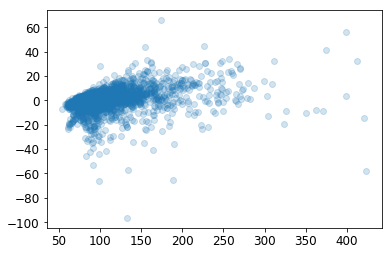

In [716]:
camera='mosaic'
which='gal'
rhalf=dict(gal=0.45,psf=0.)
slope=dict(mosaic=dict(gal=1.36))
inter=dict(mosaic=dict(gal=37.6))

y=1./M[camera,'a'].get('%snorm_mean' % which)**2
model=NeffFormulas().neff_15(M[camera,'z'].fwhm/2.35,rhalf=rhalf[which],pix=0.26)
model=slope[camera][which]*model + inter[camera][which]

plt.scatter(y,y-model,alpha=0.2)

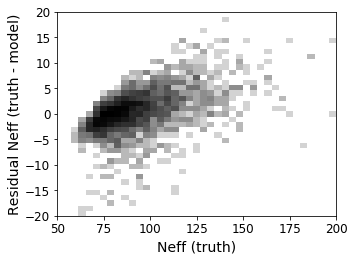

In [728]:
def myhist2D(ax,x,y,xlim=(),ylim=(),nbins=()):
    #http://www.astroml.org/book_figures/chapter1/fig_S82_hess.html
    H, xbins, ybins = np.histogram2d(x,y,
                                     bins=(np.linspace(xlim[0],xlim[1],nbins[0]),
                                           np.linspace(ylim[0],ylim[1],nbins[1])))
    # Create a black and white color map where bad data (NaNs) are white
    cmap = plt.cm.binary
    cmap.set_bad('w', 1.)
    
    H[H == 0] = 1  # prevent warnings in log10
    ax.imshow(np.log10(H).T, origin='lower',
              extent=[xbins[0], xbins[-1], ybins[0], ybins[-1]],
              cmap=cmap, interpolation='nearest',
              aspect='auto')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

fig, ax = plt.subplots(figsize=(5, 3.75))
myhist2D(ax,y,y-model,
         xlim=(50,200),ylim=(-20,20),nbins=(40,40))
ax.set_xlabel('Neff (truth)')
ax.set_ylabel(r'Residual Neff (truth - model)')



In [ ]:
fig.add_axes

In [572]:
plt.hexbin?

In [548]:
JG1 = sns.jointplot("C1", "C2", data=df, kind='reg')
JG2 = sns.jointplot("C1", "C2", data=df, kind='kde')

#subplots migration
f = plt.figure()
for J in [JG1, JG2]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)